##This project is actually divided into three parts 
1.I built the machine learning model to predict the type of card the customer may issue.( So what I am  predicting is card category that the customer is going to go for.)

2. built a Web application on the Django to mount the prediction model.

3.Deployed the Diango project on Heroku through github.

Objective

1.	Explore and visualize the dataset.

2.	Build a classification model to predict if the customer is going to churn or not

3.	Optimize the model using appropriate techniques

4.	Generate a set of insights and recommendations that will help the bank

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Data Cleaning and Explore Analysis

In [49]:
bank = pd.read_csv("drive/MyDrive/45days/Dataset/Bank customers.csv")
bank.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [50]:
bank.shape

(10127, 21)

In [51]:
bank.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [52]:
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [53]:
# So I will be needing to extract data from income_category columns and other categorical columns, since as you can see the data 
# is in string format and the range is giving, not an exact value which can be feeded into the model directly.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


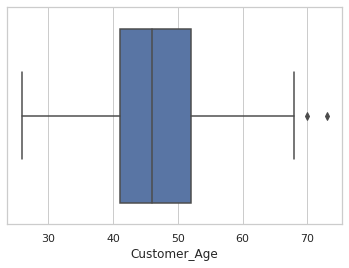

In [54]:
# Understanding about some columns first.

sns.set_theme(style="whitegrid")
sns.boxplot(bank['Customer_Age'])

In [55]:
# So most of the customers are somewhere near 45 age, mean being 45 with some outliers that are depicted by the dots on the right
# hand side at age 70 and maybe 75

In [56]:
bank[['Gender','Credit_Limit']].groupby('Gender').agg(['mean','count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [57]:
bank[['Gender','Avg_Utilization_Ratio']].groupby('Gender').agg(['mean','count'])

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [58]:
# Average Utilization Ratio: it's how much you currently owe divided by your credit limit. It is generally expressed as a percent. 
# For example, if you have a total of $10,000 in credit available on two credit cards, and a balance of $5,000 on one, your credit 
# utilization rate is 50% — you're using half of the total credit you have available. A low credit utilization rate shows you're
# using less of your available credit.

In [59]:
bank_cards = bank.groupby("Card_Category")
bank_cards['Customer_Age'].max()

Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64

In [60]:
bank_cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

In [61]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [62]:
bank_cards['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [63]:
bank_marital = bank.groupby("Marital_Status")

In [64]:
bank_marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: Card_Category, dtype: int64

In [65]:
# Now lets move forward and see if we have categorical data in our dataset.

bank.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [66]:
bank['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [67]:
# Note here that Attrition Flag has a value Attrited Customer, meaning this particular customer has already closed his/her
# account and is not associated with the bank as of now.
# Now for predicting the card classes, we can remove the people/customers who have attrited or keep it as it is, its your choice.

In [68]:
bank['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [69]:
bank['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [70]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [71]:
def ref1(x):
  if x == 'M':
    return 1
  else:
    return 0

bank['Gender'] = bank['Gender'].map(ref1)

In [72]:
def ref2(x):
  if x == 'Existing Customer':
    return 1
  else:
    return 0

bank['Attrition_Flag'] = bank['Attrition_Flag'].map(ref2)

In [73]:
# Converting Categorical data into numerical data.

y = bank['Card_Category']
X = bank.copy()
X.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [74]:
# Extracting data from the Income_Category column

X['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Next, I am importing label encoded, this is the easiest and most efficient library to use to convert  categorical data to your numerical data.

So I have to defined a function which takes in value, which is actually in column from the dataset.

In [75]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [76]:
X['Income_Category'] = label_encoded(X['Income_Category'])
X['Education_Level'] = label_encoded(X['Education_Level'])
X['Marital_Status'] = label_encoded(X['Marital_Status'])

X.head(3)

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [77]:
X.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [78]:
X = X.drop(['CLIENTNUM', 'Card_Category'], axis = 1)

In [79]:
X.shape

(10127, 19)

### Model Selecting

The reason I select a Randomforest model is because the correlation show  there is a high non-linearity & complex relationship between dependent & independent variables, therefore a tree model will outperform a classical regression method. 
What is more, the averaging makes a Random Forest better than a single Decision Tree hence improves its accuracy and reduces overfitting. A prediction from the Random Forest Regressor is an average of the predictions produced by the trees in the forest.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [116]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

Next, I'm using PCA(principal component analysis) a package which helps in reduction of your dimensions inside your data or which is also known as dimensionality reduction.

In [117]:
from sklearn.decomposition import PCA
import timeit
start = timeit.default_timer()
def modell_accuracy(feature,t_test):
  model_accuracy = []
  test_accuracy = []

  for i in np.arange(2,11):
    pca = PCA(n_components = i)
    pca_fit = pca.fit_transform(feature)
    Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit,t_test, test_size=0.2, random_state = 42)
    random_model = RandomForestClassifier(n_estimators=300, n_jobs = -1)
    random_model.fit(Xtrain, ytrain)
    #Checking the model accuracy
    random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
    #test data accuracy
    random_test_accuracy = round(random_model.score(Xtest, ytest)*100,2)
    model_accuracy.append(random_model_accuracy)
    test_accuracy.append(random_test_accuracy)
  dt=pd.DataFrame({"PAC": [2,3,4,5,6,7,8,9,10], "Train Set Accuracy": model_accuracy,"Test Set Accuracy": test_accuracy})
  return dt

  #return model_accuracy,test_accuracy
stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  0.000308829001369304


In [118]:
modell_accuracy(X,y)

,PAC,Train Set Accuracy,Test Set Accuracy
0,2,100.0,92.65
1,3,100.0,92.74
2,4,100.0,92.99
3,5,100.0,93.09
4,6,100.0,93.24
5,7,100.0,92.94
6,8,100.0,94.62
7,9,100.0,95.61
8,10,100.0,95.56


Thus,the best model should be Random forest with PCA=9

In [119]:
pca = PCA(n_components = 9)
pca_fit = pca.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit,y, test_size=0.2, random_state = 42)
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
    #test data accuracy
random_test_accuracy = round(random_model.score(Xtest, ytest)*100,2)

Why I chose  PCA2 :

This is because by you're trying to reduce down your dimensions for the data set, there's some loss of function.

So there's always a tradeoff between how much you want to reduce the size of the data and how much detail losses present.

If you have used incompetence as you have been, there might be a higher accuracy in detecting dataset.
Since 20/30 columns are very less because they have high spec computers, so they don't need to reduce the data because the time taken for training and testing is very less. But for people who have low spec laptops specifically, they might like this because it reduces the data by trying to conserve most of the information that is provided by doing it.

In [ ]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('drive/MyDrive/Dataset/Models/BankCards.pickle','wb'))

saved_pca = pickle.dump(pca2, open('drive/MyDrive/Dataset/Models/BankCardsPCA.pickle','wb'))